# Multi class Random Forest modelling using investment bins as the class to be predicted

### Import libraries and load data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [2]:
##Importing data and creating dataframe 
df = pd.read_csv('firstout.csv')
df.head()

,Unnamed: 0,id,plant,size,number,auction,capacity,physical_guarantee,sold_lots,source,...,gkf,fdi,primary_energy_consumption,g,exch,inv_US$_billion,state,inv_size,physical_guarantee_size,distance_from_last_auction
0,0,1,UHE Foz do Rio Claro,0.091,11,Leilão 2/2005,68.4,41.0,41.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.120104543,GO,10918594.82,3.727273,0.798005
1,1,2,UHE São José,0.091,11,Leilão 2/2005,51.0,30.4,30.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.08931406,RS,8119460.00,2.763636,0.798005
2,2,3,UHE Passo São João,0.091,11,Leilão 2/2005,77.0,39.0,37.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.114362101,RS,10396554.64,3.545455,0.798005
3,3,4,UHE Simplício,0.091,11,Leilão 2/2005,337.7,191.3,185.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.616054447,RJ,56004949.73,17.390909,0.798005
4,4,5,UHE Retiro Baixo,0.091,11,Leilão 2/2005,82.0,38.5,36.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.112149186,MG,10195380.55,3.500000,0.798005


In [3]:
#Retrieving keys
df.keys()

Index(['Unnamed: 0', 'id', 'plant', 'size', 'number', 'auction', 'capacity',
       'physical_guarantee', 'sold_lots', 'source', 'company_consortium',
       'year', 'price_US$', 'inv_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'g', 'exch', 'inv_US$_billion', 'state',
       'inv_size', 'physical_guarantee_size', 'distance_from_last_auction'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0', 'id', 'plant', 'number', 'auction', 'capacity',
       'sold_lots', 
       'year', 'price_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'exch',  
       'inv_size', 'physical_guarantee_size', ])
df.head()

,size,physical_guarantee,source,company_consortium,inv_US$,g,inv_US$_billion,state,distance_from_last_auction
0,0.091,41.0,hydro,Alusa Engenharia Ltda,120104543.0,84956.3,0.120104543,GO,0.798005
1,0.091,30.4,hydro,Alusa Engenharia Ltda,89314060.0,84956.3,0.08931406,RS,0.798005
2,0.091,39.0,hydro,Eletrosul S.A.,114362101.0,84956.3,0.114362101,RS,0.798005
3,0.091,191.3,hydro,Furnas\nCentrais Elétricas S.A.,616054447.0,84956.3,0.616054447,RJ,0.798005
4,0.091,38.5,hydro,Orteng Equipamentos e Sistemas Ltda.,112149186.0,84956.3,0.112149186,MG,0.798005


### Factorizing the non-numeric variables

In [5]:
#Factorize source
factor = pd.factorize(df['source'])
df.source = factor[0]
definitions = factor[1]
print(df.source.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: source, dtype: int64
Index(['hydro', 'coal', 'sugar cane bagasse', 'diesel oil', 'others',
       'fuel oil', 'biomass', 'natural gas', 'wind', 'solar', 'biogas'],
      dtype='object')


In [6]:
#Factorize state
factor2 = pd.factorize(df['state'])
df.state = factor2[0]
definitions2 = factor2[1]
print(df.state.head())
print(definitions2)

0    0
1    1
2    1
3    2
4    3
Name: state, dtype: int64
Index(['GO', 'RS', 'RJ', 'MG', 'SP', 'MT', 'PR', 'RN', 'BA', 'PE', 'SC', 'CE',
       'MA', 'MS', 'RO', 'PB', 'TO', 'ES', 'PI', 'AP', 'AL', 'SE', 'PA', 'AM',
       'RR', 'AC'],
      dtype='object')


In [7]:
#Control that it has worked in the data frame 
df = df.dropna()
df.head()

,size,physical_guarantee,source,company_consortium,inv_US$,g,inv_US$_billion,state,distance_from_last_auction
0,0.091,41.0,0,Alusa Engenharia Ltda,120104543.0,84956.3,0.120104543,0,0.798005
1,0.091,30.4,0,Alusa Engenharia Ltda,89314060.0,84956.3,0.08931406,1,0.798005
2,0.091,39.0,0,Eletrosul S.A.,114362101.0,84956.3,0.114362101,1,0.798005
3,0.091,191.3,0,Furnas\nCentrais Elétricas S.A.,616054447.0,84956.3,0.616054447,2,0.798005
4,0.091,38.5,0,Orteng Equipamentos e Sistemas Ltda.,112149186.0,84956.3,0.112149186,3,0.798005


### Creating 5 bins for investments

In [8]:
df['inv_US$_billion'] = pd.to_numeric(df['inv_US$_billion'], errors ='coerce')
inv_bin = ['A', 'B', 'C', 'D', 'E']
df['inv_bin'] = pd.cut(df['inv_US$_billion'],
                              bins=[0.01, 0.05, 0.1, 0.5, 1, 11], labels=inv_bin, ordered=True)

In [9]:
# Checked if that worked by counting values
df['inv_bin'].value_counts()

A    744
B    353
C     91
D     13
E      8
Name: inv_bin, dtype: int64

In [10]:
#Control that it has worked in the data frame 
df = df.dropna()
df.head()

,size,physical_guarantee,source,company_consortium,inv_US$,g,inv_US$_billion,state,distance_from_last_auction,inv_bin
0,0.091,41.0,0,Alusa Engenharia Ltda,120104543.0,84956.3,0.120105,0,0.798005,C
1,0.091,30.4,0,Alusa Engenharia Ltda,89314060.0,84956.3,0.089314,1,0.798005,B
2,0.091,39.0,0,Eletrosul S.A.,114362101.0,84956.3,0.114362,1,0.798005,C
3,0.091,191.3,0,Furnas\nCentrais Elétricas S.A.,616054447.0,84956.3,0.616054,2,0.798005,D
4,0.091,38.5,0,Orteng Equipamentos e Sistemas Ltda.,112149186.0,84956.3,0.112149,3,0.798005,C


### Defining the model

In [11]:
df=df[['source', 'physical_guarantee', 'state', 'inv_bin']]

In [12]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values
print('The independent features set: ')
print(X[:3,:])
print('The dependent variable: ')
print(y[:3])

The independent features set: 
[[ 0.  41.   0. ]
 [ 0.  30.4  1. ]
 [ 0.  39.   1. ]]
The dependent variable: 
['C', 'B', 'C']
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']


### Split the data into training and testing sets and feature scaling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [14]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Running the model using the "entrophy" criterion but with only one variable tuned

In [15]:
from sklearn.calibration import CalibratedClassifierCV
classifier = RandomForestClassifier(criterion = 'entropy', random_state=42, class_weight='balanced') ## with class balanced for imbalanced classification
classifier.fit(X_train, y_train)
cal_clf = CalibratedClassifierCV(classifier, method="sigmoid", cv="prefit")
cal_clf.fit(X_test, y_test)
y_score = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.predict_proba(X)

array([[0.  , 0.02, 0.22, 0.11, 0.65],
       [0.  , 0.  , 0.21, 0.25, 0.54],
       [0.  , 0.  , 0.21, 0.25, 0.54],
       ...,
       [0.04, 0.35, 0.06, 0.27, 0.28],
       [0.04, 0.35, 0.06, 0.27, 0.28],
       [0.04, 0.35, 0.09, 0.29, 0.23]])

### Obtaining predictions
***
#### With a much less judicious use of the algorithm's tuning possibities, the results are more mixed

In [16]:
y_pred

array(['B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A',
       'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'A',
       'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'B', 'B',
       'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A',
       'B', 'A', 'A', 'D', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A',
       'A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'D', 'B',
       'A', 'A', 'C', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'C', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B',
       'A', 'A', 'D', 'B'], dtype=object)

### Some steps towards analysing the result

In [17]:
#Creating a dataframe with the predicition array
df2 = pd.DataFrame(y_pred, columns = ['inv_bin'])
df2

,inv_bin
0,B
1,A
2,A
3,B
4,A
...,...
116,B
117,A
118,A
119,D


In [18]:
#Count predicted values
df2['inv_bin'].value_counts()

A    75
B    37
C     6
D     3
Name: inv_bin, dtype: int64

In [19]:
#Normalize counted values
df2.inv_bin.value_counts(normalize=True)

A    0.619835
B    0.305785
C    0.049587
D    0.024793
Name: inv_bin, dtype: float64

### An analysis of the metrics

#### Accuracy score

In [20]:
# The accuracy score substantially larger as when many parameters are tuned
accuracy_score(y_test, y_pred)


0.7272727272727273

#### The confusion matrix 

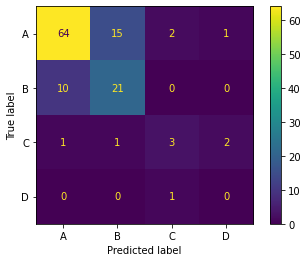

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

#### The statistics obtained from the confusion matrix for the multiclass problem are calculated as follows:
- Precision = TP/(TP+FP)
- Recall = TP(TP+FN)

<img width="50%" height="50%" align="left" src="confusionmatrix2.png"> 

In [22]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           A       0.85      0.78      0.82        82
           B       0.57      0.68      0.62        31
           C       0.50      0.43      0.46         7
           D       0.00      0.00      0.00         1

    accuracy                           0.73       121
   macro avg       0.48      0.47      0.47       121
weighted avg       0.75      0.73      0.74       121



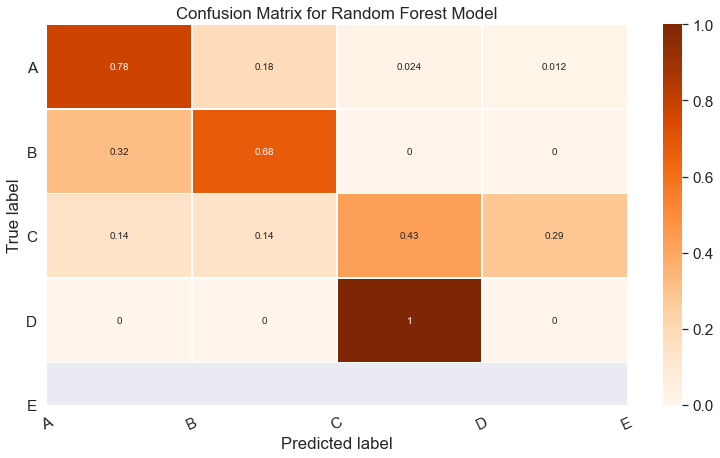

In [23]:
# Visualizing the confusion matrix with percentages
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Oranges, linewidths=0.2)

# Add labels to the plot
class_names = ['A','B', 'C', 'D', 'E']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Log Loss 

In [24]:
from sklearn.metrics import log_loss

clf_probs = classifier.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)

score = log_loss(y_test, clf_probs, labels=['A','B','C','D', 'E'])
cal_score = log_loss(y_test, cal_clf_probs, labels=['A','B','C','D', 'E'])

print("Log-loss of")
print(f" * uncalibrated classifier: {score:.3f}")
print(f" * calibrated classifier: {cal_score:.3f}")

Log-loss of
 * uncalibrated classifier: 1.183
 * calibrated classifier: 0.616


According to this [resource](https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d), a relatively high log-loss (significantly larger than 0) is acceptable for the case of a multiclass problem.

#### Roc/Auc Score

In [25]:
roc_auc_score(y, cal_clf.predict_proba(X), multi_class='ovr')

0.5076400277404425

According to the available resources, an Roc/Auc score of 1 would be the best score. The present one is average at best.

#### Key conclusions

##### The results are reasonably satisfactory, in line with the proposed analysis. Not only is the "A" (the lowest tier) the most predicted category, but also it is the one with the highest accuracy. In addition, by including the "class_weight='balanced'" tuning option, room was opened for predicting the unexpected, namely more higher bins of larger expected investments. In comparison to other cases, however, the accuracy score and the log-loss were not that high.